<a href="https://colab.research.google.com/github/JimenezHAnaFer/MetodosN/blob/main/M%C3%A9todo_de_la_Secante1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
def secant(fun, x_a, x_b, steps=50):
    # El método de la secante no se puede aplicar
    if fun(x_a) * fun(x_b) >= 0:
        print('El método de la secante no se puede aplicar')
        return None
    
    # El método de la secante 
    for n in range(steps + 1):
        # Cálculo de la secante
        x_n = x_a - fun(x_a)*(x_b - x_a)/(fun(x_b) - fun(x_a))
        
        if fun(x_n) == 0:
            return x_n
        
        if fun(x_a) * fun(x_n) < 0:
            x_b = x_n
        else:
            x_a = x_n

    return x_n

In [3]:
f = lambda x: x**2 + 2*x - 8

secant(f, 0, 5,  5) # 1.995887594242632
secant(f, 0, 5, 15) # 1.9999999303082814
secant(f, 0, 5, 25) # 1.9999999999988198
secant(f, 0, 5, 35) # 2.0

2.0

In [4]:
# Método de la secante
# Ejemplo 1 (Burden ejemplo 1 p.51/pdf.61)

import numpy as np

def secante_tabla(fx,xa,tolera):
    dx = 4*tolera
    xb = xa + dx
    tramo = dx
    tabla = []
    while (tramo>=tolera):
        fa = fx(xa)
        fb = fx(xb)
        xc = xa - fa*(xb-xa)/(fb-fa)
        tramo = abs(xc-xa)
        
        tabla.append([xa,xb,xc,tramo])
        xb = xa
        xa = xc

    tabla = np.array(tabla)
    return(tabla)

# PROGRAMA ---------------------
# INGRESO
fx = lambda x: x**3 + 4*x**2 - 10

a  = 1
b  = 2
xa = 1.5
tolera = 0.001
tramos = 100

# PROCEDIMIENTO
tabla = secante_tabla(fx,xa,tolera)
n = len(tabla)
raiz = tabla[n-1,2]

# SALIDA
np.set_printoptions(precision=4)
print('[xa ,\t xb , \t xc , \t tramo]')
for i in range(0,n,1):
    print(tabla[i])
print('raiz en: ', raiz)

[xa ,	 xb , 	 xc , 	 tramo]
[1.5    1.504  1.3736 0.1264]
[1.3736 1.5    1.3658 0.0078]
[1.3658e+00 1.3736e+00 1.3652e+00 5.2085e-04]
raiz en:  1.3652321429167764


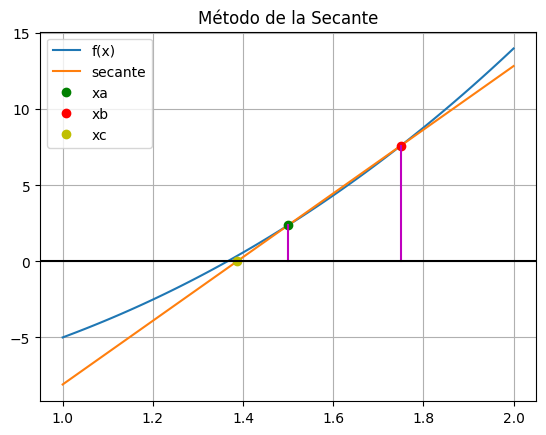

In [5]:
# GRAFICA
import matplotlib.pyplot as plt

# Calcula los puntos a graficar
xi = np.linspace(a,b,tramos+1)
fi = fx(xi)
dx = (b-xa)/2
pendiente = (fx(xa+dx)-fx(xa))/(xa+dx-xa)
b0 = fx(xa) - pendiente*xa
tangentei = pendiente*xi+b0

fxa = fx(xa)
xb = xa + dx
fxb = fx(xb)

plt.plot(xi,fi, label='f(x)')

plt.plot(xi,tangentei, label='secante')
plt.plot(xa,fx(xa),'go', label='xa')
plt.plot(xa+dx,fx(xa+dx),'ro', label='xb')
plt.plot((-b0/pendiente),0,'yo', label='xc')

plt.plot([xa,xa],[0,fxa],'m')
plt.plot([xb,xb],[0,fxb],'m')

plt.axhline(0, color='k')
plt.title('Método de la Secante')
plt.legend()
plt.grid()
plt.show()